# Paddle Ball

In [1]:
# Load Packages
import scipy
import matplotlib.pyplot
import numpy
import math
import malbrid

In [2]:
def get_dynamics_and_zero_crossing_functions_controller(state_name):
    ATimeCount = numpy.array([[0,0,1]]) 

    x = simulator.get_var("x")
    t = simulator.get_var("t")
    # CS also used

    def nobumpUp(x):
        return "Go",numpy.array([x[0],0,x[2]]),False
    def nobumpDown(x):
        return "End",numpy.array([x[0],0,x[2]]),False
    def nobumpStill(x):
        return "Wait",numpy.array([x[0],0,x[2]]),False

    if state_name=="Wait":
        zero_crossing_end_up = x<=1
        return ATimeCount, [(zero_crossing_end_up, "GoUp", nobumpUp)]
    if state_name=="Go":
        zero_crossing_end_up = t>=0.5
        return ATimeCount, [(zero_crossing_end_up, "GoDown", nobumpDown)]
    if state_name=="End":
        zero_crossing_end_up = t>=0.5
        return ATimeCount, [(zero_crossing_end_up, "GoStill", nobumpStill)]
    else:
        raise Exception("Internal Test error:"+str(state_name))


def get_dynamics_and_zero_crossing_functions_system(state_name):
    # Dynamics matrices
    APaddleDown = numpy.array([[0, 1, 0, 0], [0, 0, 0 ,-9.81], [0, 0, 0, -1], [0, 0, 0, 0 ]],dtype=numpy.float64)
    APaddleUp = numpy.array([[0, 1, 0, 0], [0, 0, 0 , -9.81], [0, 0, 0, 1], [0, 0, 0, 0 ]],dtype=numpy.float64)
    APaddleStill = numpy.array([[0, 1, 0, 0], [0, 0, 0 ,-9.81], [0, 0, 0, 0],[0, 0, 0, 0 ]],dtype=numpy.float64)

    x = simulator.get_var("x")
    xs = simulator.get_var("xspeed")
    p = simulator.get_var("p")
    # CS also defined

    def bumpPaddleUp(x):
        return "PaddleUp",numpy.array([x[0],-0.9*x[1]+0.9,x[2],x[3]]),False
    def bumpPaddleDown(x):
        return "PaddleDown",numpy.array([x[0],-0.9*x[1]-0.9,x[2],x[3]]),False
    def bumpPaddleStill(x):
        return "PaddleStill",numpy.array([x[0],-0.9*x[1],x[2],x[3]]),False
    def nobumpPaddleToUp(x):
        return "PaddleUp",numpy.array([x[0],x[1],x[2],x[3]]),False
    def nobumpPaddleToDown(x):
        return "PaddleDown",numpy.array([x[0],x[1],x[2],x[3]]),False
    def nobumpPaddleToStill(x):
        return "PaddleStill",numpy.array([x[0],x[1],x[2],x[3]]),False

    if state_name=="PaddleUp":
        zero_crossing_end_up = simulator.get_true_condition()
        zero_crossing_bump = (x<=p) & (xs<1)
        return APaddleUp, [(zero_crossing_end_up, "GoDown", nobumpPaddleToDown),(zero_crossing_bump, "bump", bumpPaddleUp)]
    if state_name=="PaddleDown":
        zero_crossing_end_up = simulator.get_true_condition()
        zero_crossing_bump = (x<=p) & (xs<-1)
        return APaddleDown, [(zero_crossing_end_up, "GoStill", nobumpPaddleToStill),(zero_crossing_bump, "bump", bumpPaddleDown)]
    if state_name=="PaddleStill":
        zero_crossing_end_up = simulator.get_true_condition()
        zero_crossing_bump = (x<=p) & (xs<0) & (~zero_crossing_end_up)
        return APaddleStill, [(zero_crossing_end_up, "GoUp", nobumpPaddleToUp),(zero_crossing_bump, "bump", bumpPaddleStill)]
    else:
        raise Exception("Internal Test error:"+str(state_name))

'''A test case for the bouncing ball -- Product state case'''
simulator = malbrid.LinearSystemSimulator(["x", "xspeed", "p", "t", "const"])

product_dynamics = malbrid.compute_product_dynamics(
    [("x",1,[0,1]),("xspeed",1,[1]), 
     ("p",1,[1]),("t",0,[0]),("const",1,[0,1])],
    get_dynamics_and_zero_crossing_functions_controller,
    get_dynamics_and_zero_crossing_functions_system,["GoUp","GoDown","GoStill"])

In [3]:
simulator.simulate(product_dynamics, ("Wait","PaddleStill"),numpy.array([10.0,0,0,0,1.0]),
                           max_time=35.5)

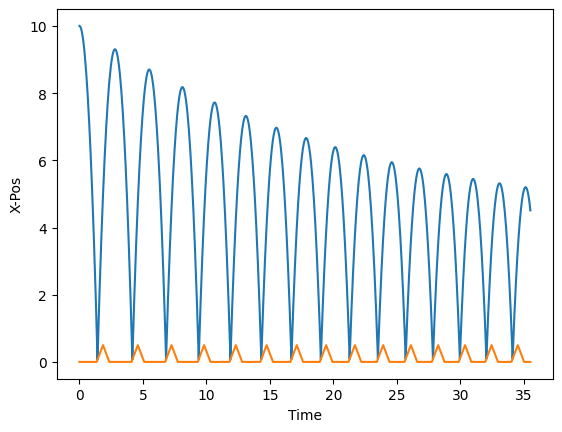

In [4]:
matplotlib.pyplot.plot(numpy.array(simulator.time_points)[:],numpy.array(simulator.continuous_states)[:,0])
matplotlib.pyplot.plot(numpy.array(simulator.time_points)[:],numpy.array(simulator.continuous_states)[:,2])
matplotlib.pyplot.xlabel('Time')
matplotlib.pyplot.ylabel('X-Pos')
matplotlib.pyplot.show()
